In [27]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 1000

optimizer = AdaGrad()

def test(t, act_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    optimizer = {}


    for key in act_list:
        networks[key] = MultiLayerNet(
            input_size=784, hidden_size_list=[100, 100, 100, 100],
            output_size=10, activation=key, weight_init_std=key, threshold=t)
        train_acc[key] = []
        train_loss[key] = []

        optimizer[key] = AdaGrad()

    for i in range(max_iterations):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        if i % 100 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        for key in act_list:
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            loss = networks[key].loss(x_batch, t_batch)
            acc = networks[key].accuracy(x_batch, t_batch)
            train_acc[key].append(acc)
            train_loss[key].append(loss)
            if i % 100 == 0:
                # print(key + " loss:" + str(acc))
                print(key + " loss:" + str(loss))

    return train_acc, train_loss

In [28]:
act = ['sigmoid', 'relu', 'nSigmoid']

train_acc, train_loss = test(0.5, act)

===========iteration:0===========
sigmoid loss:2.369152493764471
relu loss:2.423455878351465
nSigmoid loss:2.495428844437812
===========iteration:100===========
sigmoid loss:1.0634623345189387
relu loss:0.2158502063429432
nSigmoid loss:0.3772786559954533
===========iteration:200===========
sigmoid loss:0.7960812194321809
relu loss:0.16163090485481613
nSigmoid loss:0.2623485851568584
===========iteration:300===========
sigmoid loss:0.6559833091296869
relu loss:0.10778704892336263
nSigmoid loss:0.2233619850109772
===========iteration:400===========
sigmoid loss:0.5907546538742914
relu loss:0.0660210052441561
nSigmoid loss:0.16874320530597858
===========iteration:500===========
sigmoid loss:0.479932168865537
relu loss:0.04520482074984197
nSigmoid loss:0.10364798011465907
===========iteration:600===========
sigmoid loss:0.5262769159905822
relu loss:0.04668260484772267
nSigmoid loss:0.10177311805721548
===========iteration:700===========
sigmoid loss:0.48376541469738343
relu loss:0.09180242

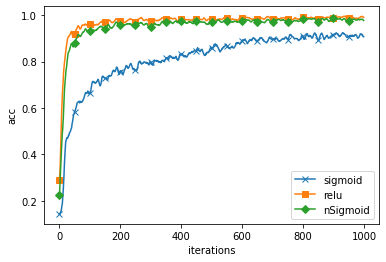

In [29]:
markers = {'sigmoid':"x", 'relu':"s", 'nSigmoid':"D"}
x = np.arange(max_iterations)
for key in act:
    plt.plot(x, smooth_curve(train_acc[key]), marker=markers[key], markevery=50, label=key)
plt.xlabel("iterations")
plt.ylabel("acc")
plt.legend()
plt.show()

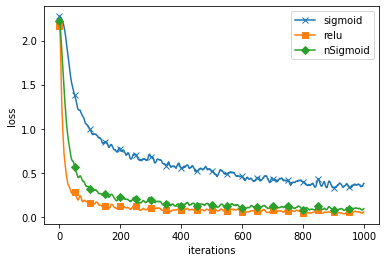

In [30]:
for key in act:
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=50, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

In [31]:
for key in act:
    print(key + " best acc:" + str(max(train_acc[key])))
    print(key + " best loss:" + str(min(train_loss[key])))

sigmoid best acc:0.9765625
sigmoid best loss:0.21205408633122858
relu best acc:1.0
relu best loss:0.012186608693547932
nSigmoid best acc:1.0
nSigmoid best loss:0.03179693438306068


In [32]:
# act = ['nSigmoid']
# for i in range(1):
#     print(i)
#     t_a, t_l = test(0.5, act)
#
#     with open('./result/128_10/test/3.txt', 'a') as f:
#         for key in act:
#             f.write(str(i) + " best acc: " + str(max(t_a[key])) + '\n')
#             f.write(str(i) + " best loss: " + str(min(t_l[key])) + '\n')
